<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/mod_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total NA values: 31
Total NA values after replacing 0 with NA: 31
Outliers indices: {'Unnamed: 0': array([], dtype=int64), 'Age': array([], dtype=int64), 'ALB': array([216, 259, 346, 405, 533, 535, 537, 538, 539, 590, 596, 603, 610]), 'ALP': array([539, 590, 594]), 'ALT': array([114, 536, 539, 567, 568, 569, 575, 581, 583, 591]), 'AST': array([126, 539, 542, 543, 558, 572, 577, 588, 593, 595, 598, 602, 608,
       609]), 'BIL': array([587, 590, 594, 597, 600, 601, 605]), 'CHE': array([108, 183, 209, 235, 555, 590, 595, 601, 611]), 'CHOL': array([ 89, 124, 204, 230, 379, 546, 588]), 'CREA': array([586, 591, 606]), 'GGT': array([205, 533, 538, 539, 558, 559, 593, 598, 602, 610]), 'PROT': array([ 27, 509, 534, 535, 537, 538, 539, 545, 596])}


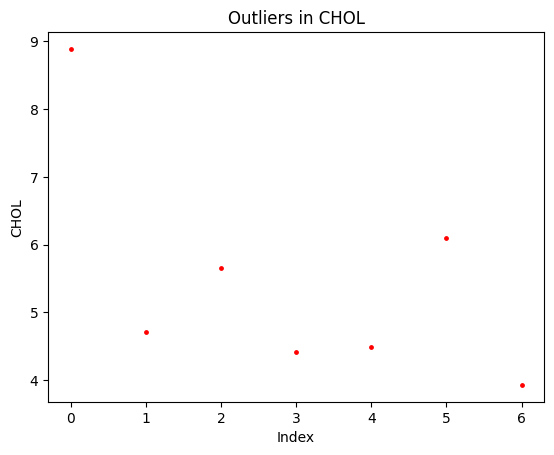

Dimensions of data: (615, 14)


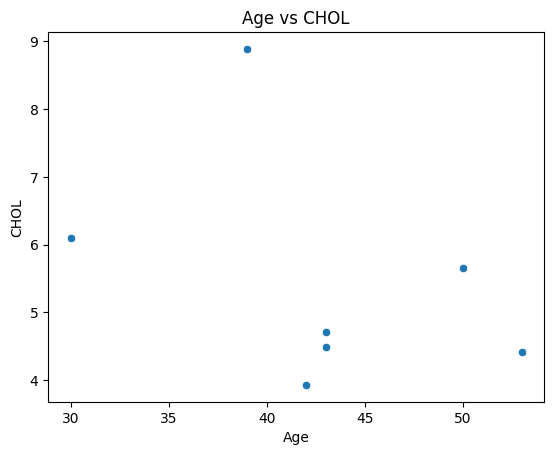

Number of missing values before imputing Unnamed: 0: 0
Number of missing values after imputing Unnamed: 0: 0
Number of missing values before imputing Age: 0
Number of missing values after imputing Age: 0
Number of missing values before imputing ALB: 1
Number of missing values after imputing ALB: 0
Number of missing values before imputing ALP: 18
Number of missing values after imputing ALP: 0
Number of missing values before imputing ALT: 1
Number of missing values after imputing ALT: 0
Number of missing values before imputing AST: 0
Number of missing values after imputing AST: 0
Number of missing values before imputing BIL: 0
Number of missing values after imputing BIL: 0
Number of missing values before imputing CHE: 0
Number of missing values after imputing CHE: 0
Number of missing values before imputing CHOL: 10
Number of missing values after imputing CHOL: 0
Number of missing values before imputing CREA: 0
Number of missing values after imputing CREA: 0
Number of missing values befor

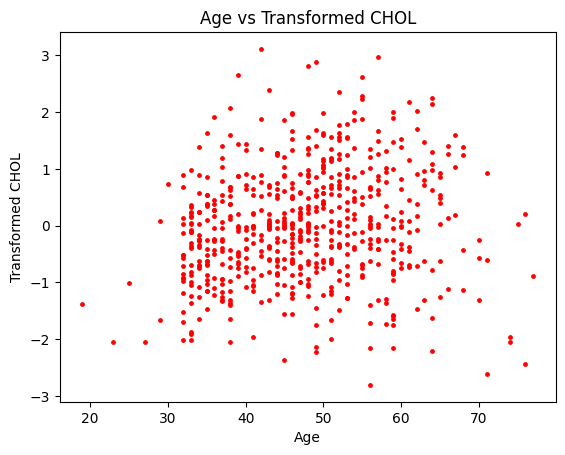

Age_bin
Medium    367
Low       145
High      103
Name: count, dtype: int64


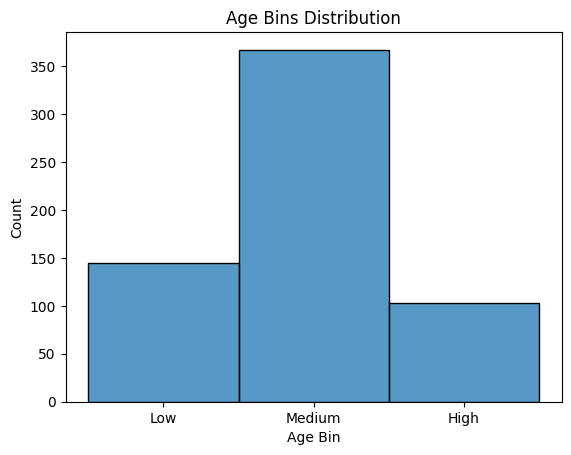

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# Load the data
data = pd.read_csv("/content/HepatitisCdata.csv")

# Diagnosis of data
# NA values
print("Total NA values:", data.isna().sum().sum())
data.replace(0, np.nan, inplace=True)
print("Total NA values after replacing 0 with NA:", data.isna().sum().sum())

# Outliers
def find_outliers(column):
    z_scores = zscore(column)
    return np.where(np.abs(z_scores) > 3)[0]

outliers_idx = {}
for col in data.columns:
    if data[col].dtype in [np.float64, np.int64]:
        outliers_idx[col] = find_outliers(data[col].dropna())

print("Outliers indices:", outliers_idx)


chol_vector = data.iloc[list(outliers_idx["CHOL"])]["CHOL"]
x_axis = np.arange(len(chol_vector))
plt.scatter(x_axis, chol_vector, c='red', s=6)
plt.xlabel("Index")
plt.ylabel("CHOL")
plt.title("Outliers in CHOL")
plt.show()

print("Dimensions of data:", data.shape)

# Relationship visualization
x = data['Age']
y = chol_vector
sns.scatterplot(x=x, y=y)
plt.xlabel("Age")
plt.ylabel("CHOL")
plt.title("Age vs CHOL")
plt.show()

# Imputing missing values
for col in data.columns:
    if col in ['X', 'Category', 'Sex']:  # Replace with actual column names
        continue
    col_data = data[col]
    print(f"Number of missing values before imputing {col}: {col_data.isna().sum()}")

    imputer = SimpleImputer(strategy="mean")
    data[col] = imputer.fit_transform(data[[col]])

    print(f"Number of missing values after imputing {col}: {data[col].isna().sum()}")

data.fillna(0, inplace=True)
# Count the number of zeros in the CHOL column
print("Number of zeros in CHOL vector:", (data.loc[outliers_idx['CHOL'], "CHOL"] == 0).sum())


# Imputing outliers
for col, indices in outliers_idx.items():
    if len(indices) > 0:
        print(f"Attributes with outliers: {col}")
        col_data = data[col]
        data[col] = np.where(
            np.abs(zscore(col_data)) > 3,
            np.nan,  # Replace outliers with NaN
            col_data
        )
        imputer = SimpleImputer(strategy="mean")
        data[col] = imputer.fit_transform(data[[col]])

# Summary
print(data.describe())

# Transform and plot CHOL
chol_transformed = zscore(data['CHOL'])
data['CHOL_transformed'] = chol_transformed

plt.scatter(data['Age'], chol_transformed, c='red', s=6)
plt.xlabel("Age")
plt.ylabel("Transformed CHOL")
plt.title("Age vs Transformed CHOL")
plt.show()

# Binning Age
data['Age_bin'] = pd.cut(data['Age'], bins=3, labels=["Low", "Medium", "High"])
print(data['Age_bin'].value_counts())

# Plot Age Bins
sns.histplot(data['Age_bin'], kde=False)
plt.title("Age Bins Distribution")
plt.xlabel("Age Bin")
plt.ylabel("Count")
plt.show()